In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import math

In [2]:
def MakeThicknessList(ListPaths):
    Thickness = []
    for i in ListPaths:
        Thickness.append(int(i.split("/")[-1].split(".")[0]))
    Thickness = np.array(Thickness)
    return(Thickness)

def OpenTxt(Path):
    with open(Path) as textFile:
        lines = [line.split() for line in textFile]
    List = []
    for i in lines:
        List.append(i[0])
    return(List)

DataPath = "/media/ug-ml/Samsung_T5/Classification/Classification36/FilePaths/"

TrainPath = OpenTxt(DataPath + "Train_0p1.txt")
ValPath = OpenTxt(DataPath + "Validation_0p1.txt")
TestPath = OpenTxt(DataPath + "Test_0p1.txt")

TrainThickness = MakeThicknessList(TrainPath)
ValThickness = MakeThicknessList(ValPath)
TestThickness = MakeThicknessList(TestPath)

In [3]:
def Position():
    IndexArray = np.zeros(8 * 8, dtype = int).reshape(8, 8) #Declare Image array
    index = 0
    for i in range(0, 8):
        for j in range(0, 8):
            if(i >= j):
                IndexArray[i][j] = index
                index+=1
            else:
                IndexArray[i][j] = -1
    return IndexArray

def ShowAllDirection(IndexArray, ImagePath):
    Image = np.load(ImagePath)
    n = IndexArray.shape[0]
    digit_size = 128
    figsize=12
    figure = np.zeros((digit_size * n, digit_size * n))
    
    
    for i in range(0, IndexArray.shape[0]):
        for j in range(0, IndexArray.shape[1]):
            if(i >= j):
                digit = Image[IndexArray[i][j]]
                digit = (digit - np.min(digit)) / (np.max(digit) - np.min(digit))
                figure[
                    i * digit_size : (i + 1) * digit_size,
                    j * digit_size : (j + 1) * digit_size,
                ] = digit
    
    plt.figure(figsize=(figsize, figsize))
    
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap="Greys_r")
    plt.show()

def ShowAllThickness000(ImageBasePath):
    Image = np.zeros(10 * 128 * 128, dtype = np.float).reshape(10, 128, 128)
    
    nx = 5
    ny = 2
    
    digit_size = 128
    figsize=12
    figure = np.zeros((digit_size * nx, digit_size * ny))
    
    for i in range(0, 10):
        Image[i] = np.load(ImageBasePath + str(i) + ".npy")[0]
        Image[i] = (Image[i] - np.min(Image[i])) / (np.max(Image[i]) - np.min(Image[i]))
        
        nx_i = int(i / ny)
        nx_j = i - nx_i * ny
        
        figure[
            nx_i * digit_size : (nx_i + 1) * digit_size,
            nx_j * digit_size : (nx_j + 1) * digit_size,
        ] = Image[i]
    
    plt.figure(figsize=(nx * 10, ny * 10))
    
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap="Greys_r")
    plt.show()

[[ 0 -1 -1 -1 -1 -1 -1 -1]
 [ 1  2 -1 -1 -1 -1 -1 -1]
 [ 3  4  5 -1 -1 -1 -1 -1]
 [ 6  7  8  9 -1 -1 -1 -1]
 [10 11 12 13 14 -1 -1 -1]
 [15 16 17 18 19 20 -1 -1]
 [21 22 23 24 25 26 27 -1]
 [28 29 30 31 32 33 34 35]]
/media/ug-ml/Samsung_T5/Classification/Classification36/Data/100/


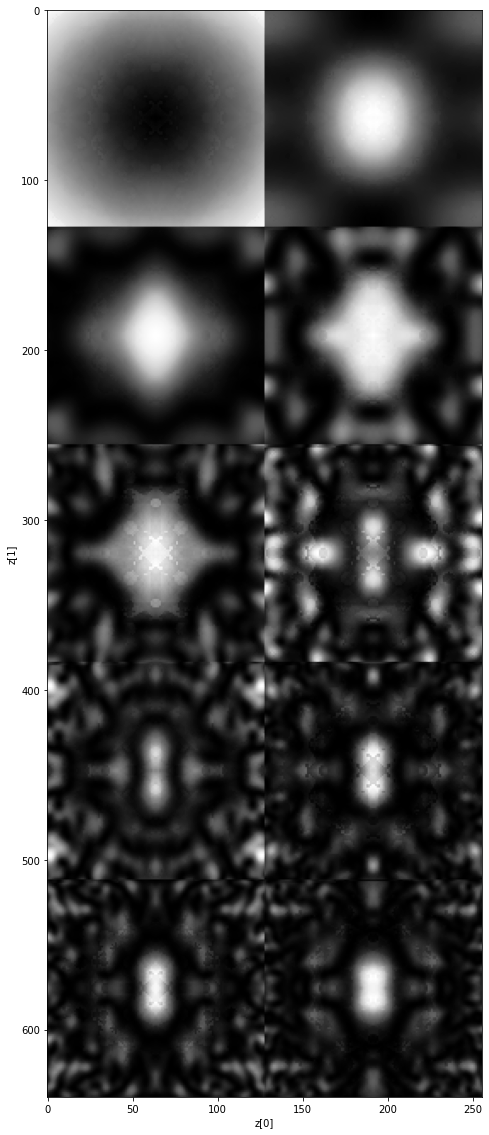

/media/ug-ml/Samsung_T5/Classification/Classification36/Data/100/0.npy


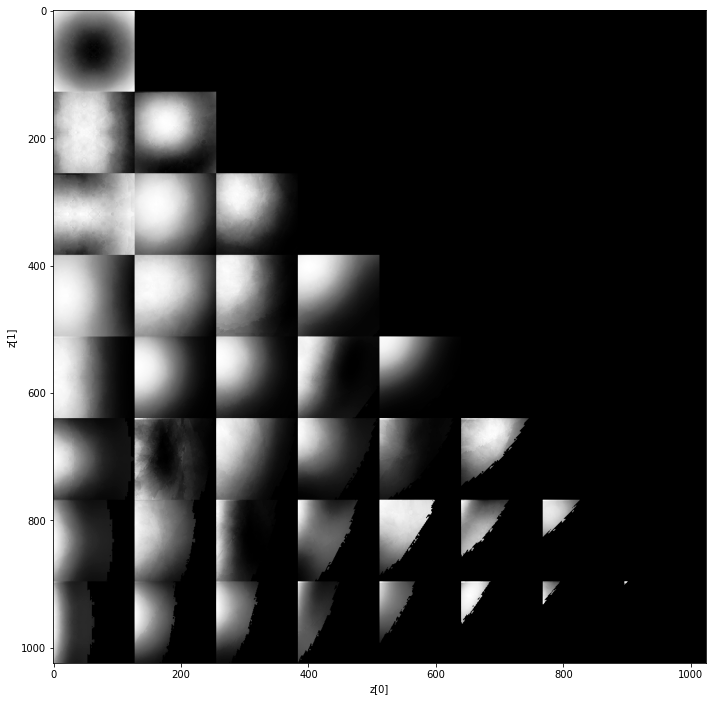

/media/ug-ml/Samsung_T5/Classification/Classification36/Data/100/1.npy


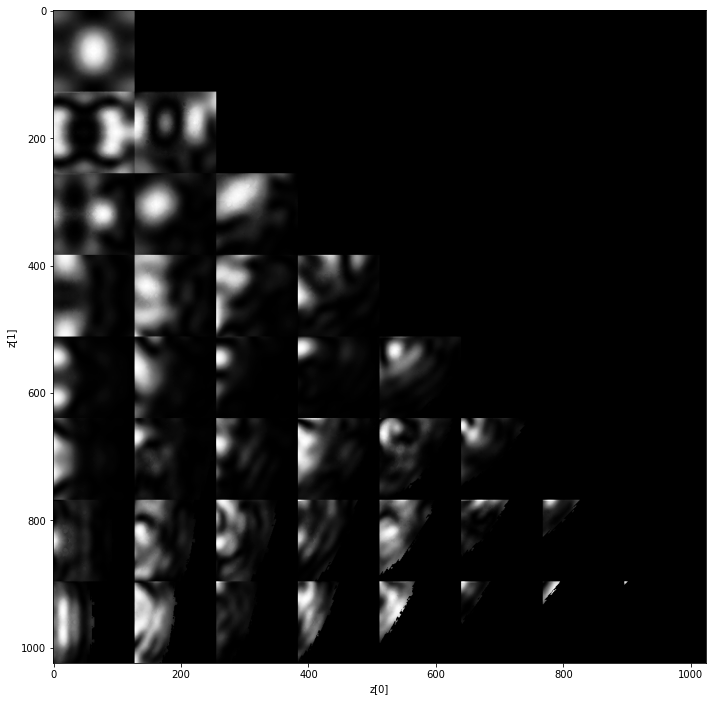

/media/ug-ml/Samsung_T5/Classification/Classification36/Data/100/2.npy


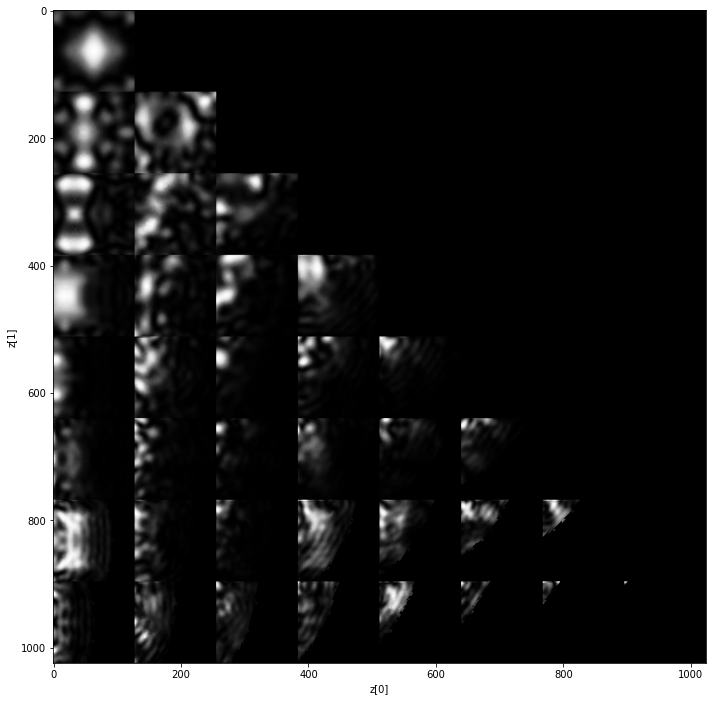

/media/ug-ml/Samsung_T5/Classification/Classification36/Data/100/3.npy


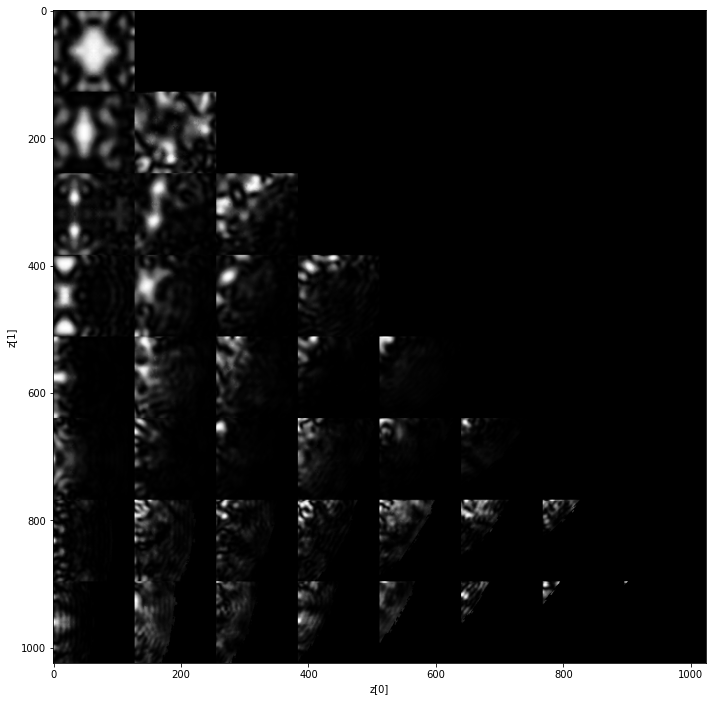

/media/ug-ml/Samsung_T5/Classification/Classification36/Data/100/4.npy


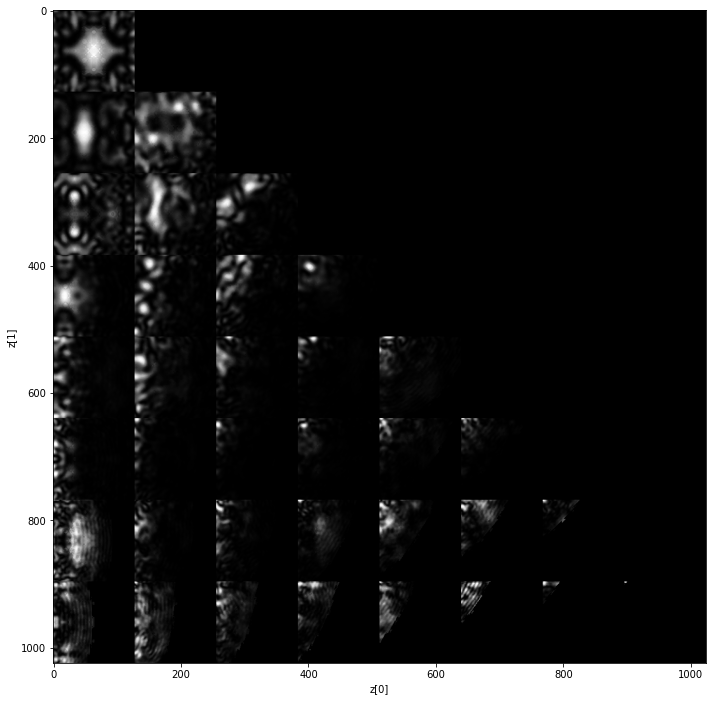

/media/ug-ml/Samsung_T5/Classification/Classification36/Data/100/5.npy


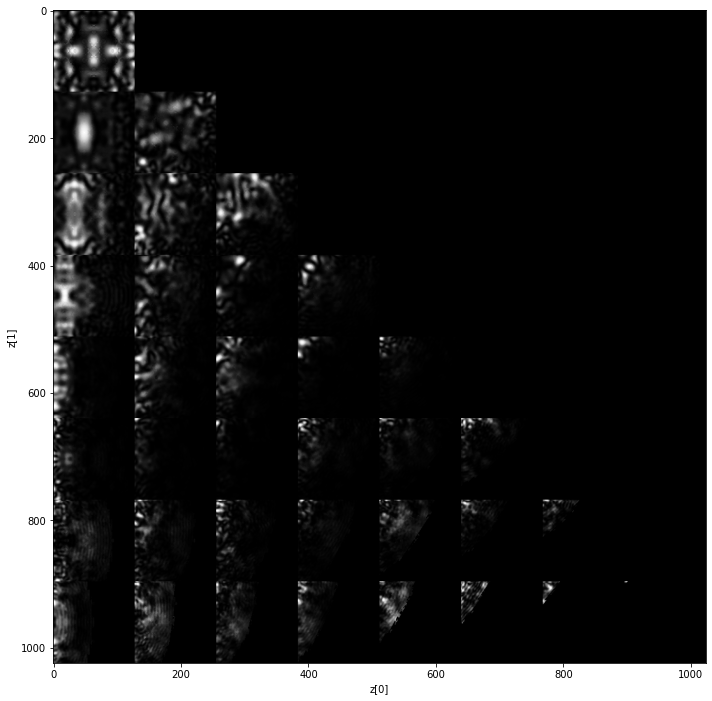

/media/ug-ml/Samsung_T5/Classification/Classification36/Data/100/6.npy


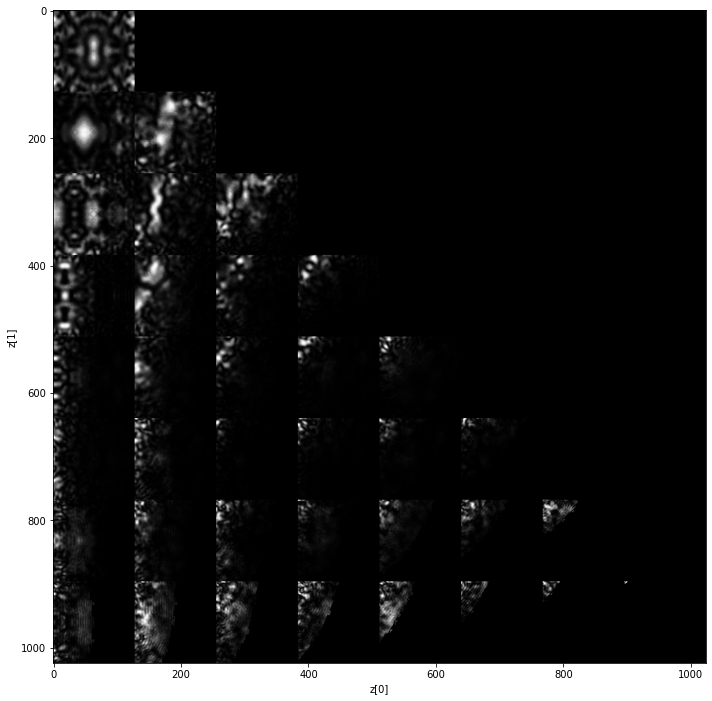

/media/ug-ml/Samsung_T5/Classification/Classification36/Data/100/7.npy


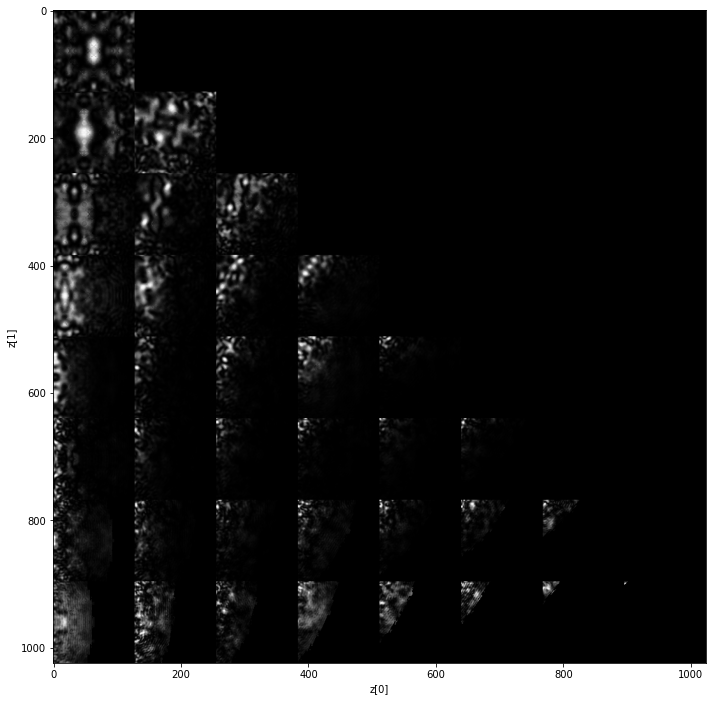

/media/ug-ml/Samsung_T5/Classification/Classification36/Data/100/8.npy


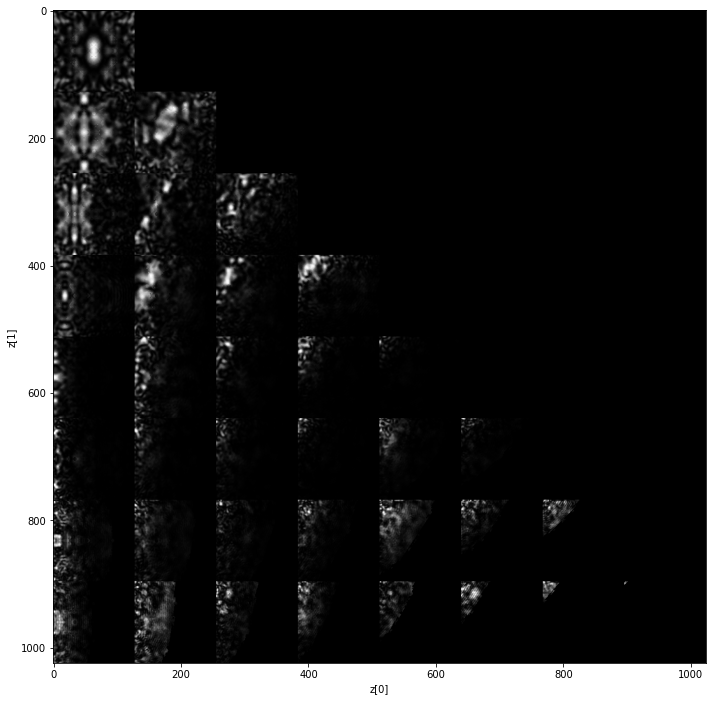

/media/ug-ml/Samsung_T5/Classification/Classification36/Data/100/9.npy


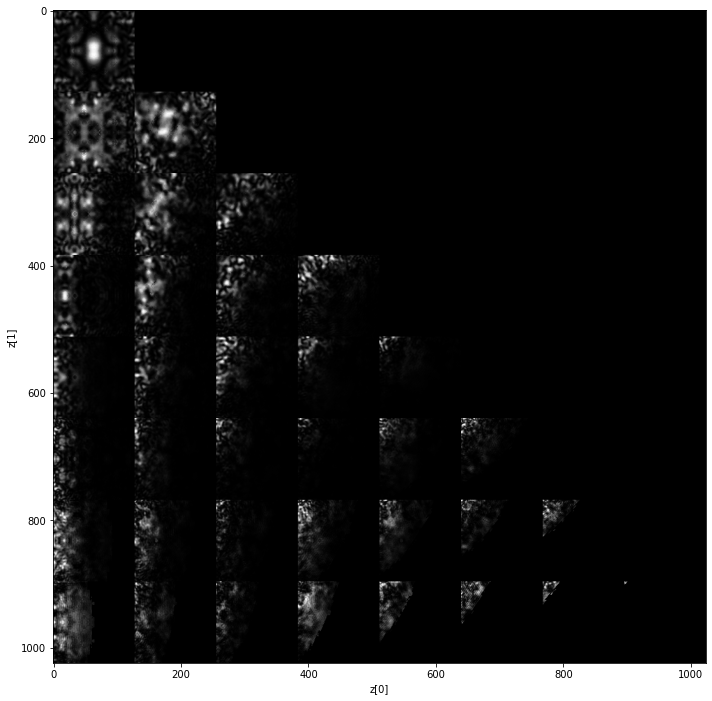

/media/ug-ml/Samsung_T5/Classification/Classification36/Data/101/


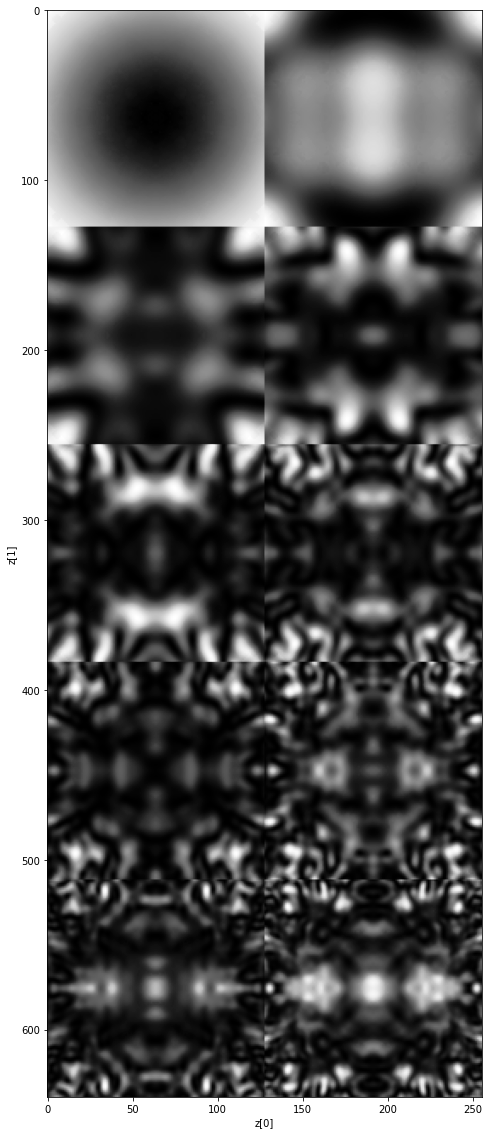

/media/ug-ml/Samsung_T5/Classification/Classification36/Data/101/0.npy


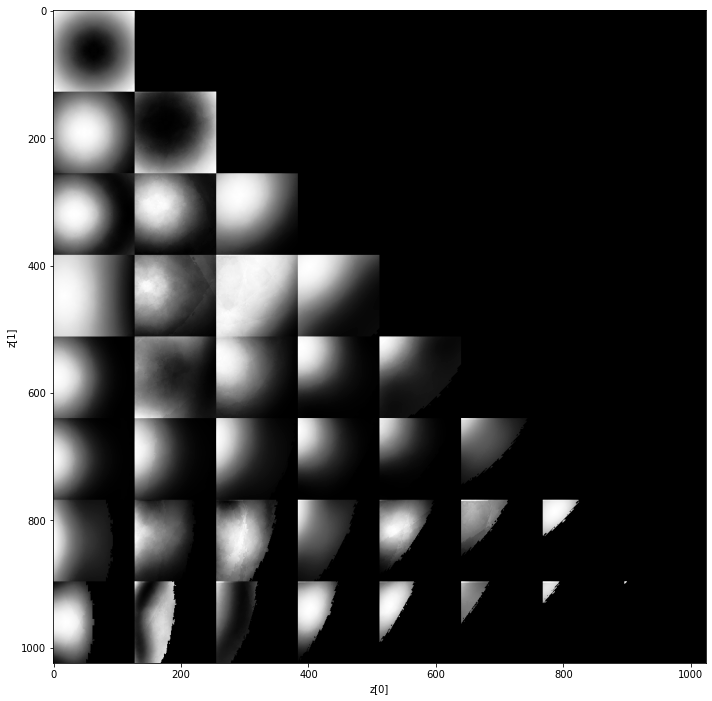

/media/ug-ml/Samsung_T5/Classification/Classification36/Data/101/1.npy


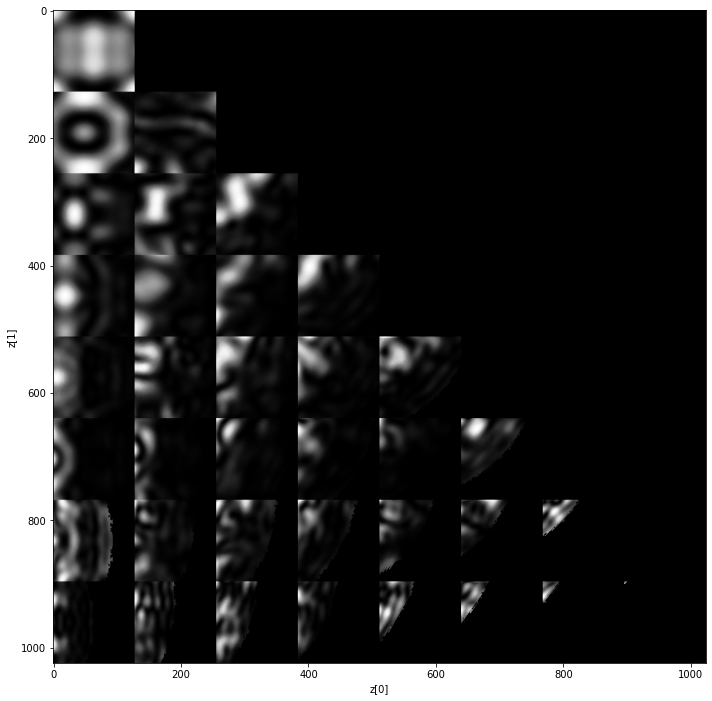

/media/ug-ml/Samsung_T5/Classification/Classification36/Data/101/2.npy


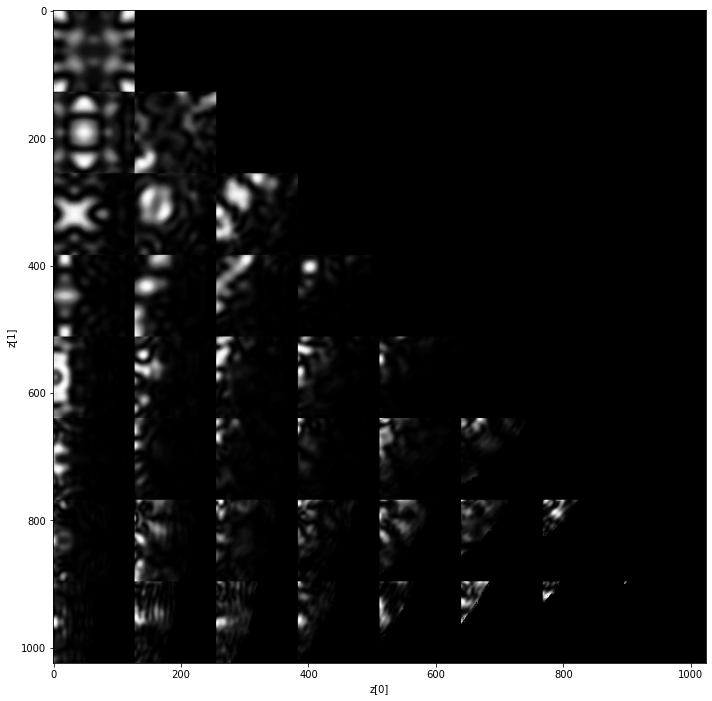

/media/ug-ml/Samsung_T5/Classification/Classification36/Data/101/3.npy


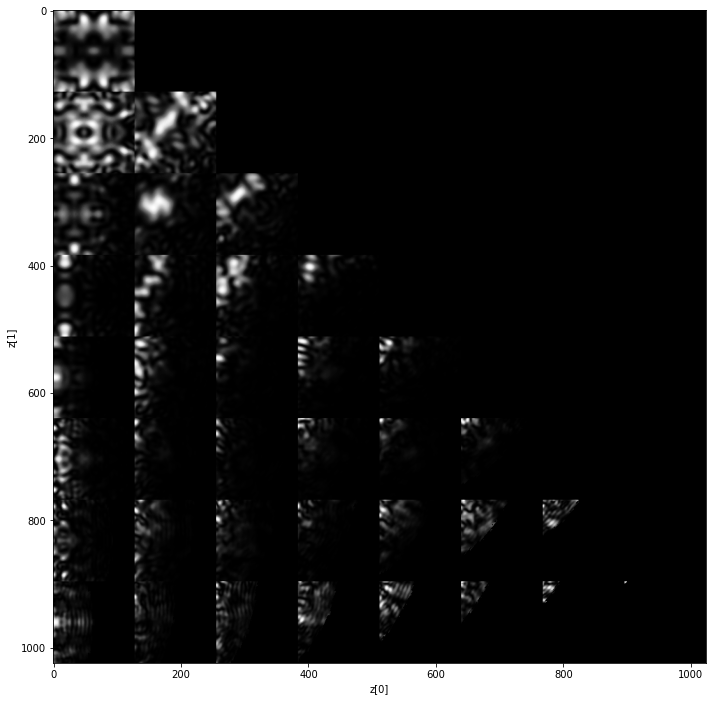

/media/ug-ml/Samsung_T5/Classification/Classification36/Data/101/4.npy


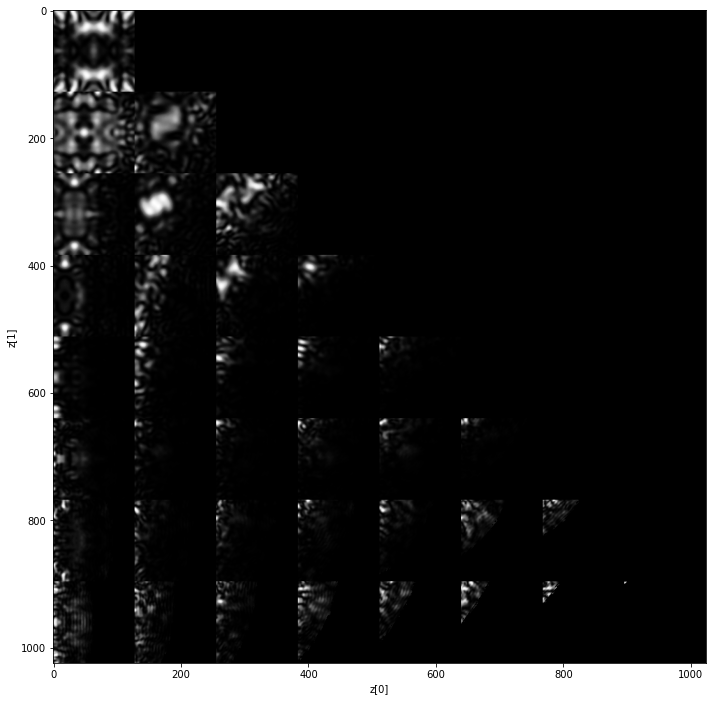

/media/ug-ml/Samsung_T5/Classification/Classification36/Data/101/5.npy


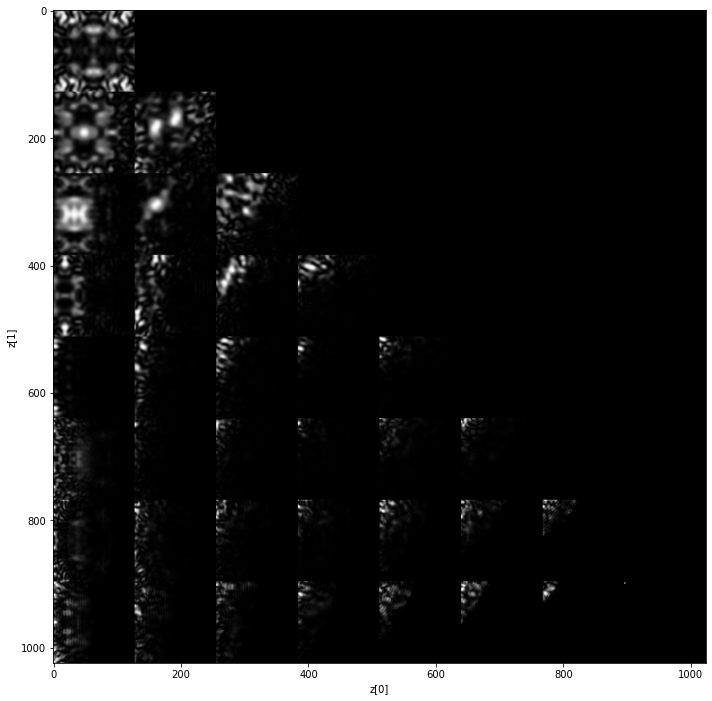

/media/ug-ml/Samsung_T5/Classification/Classification36/Data/101/6.npy


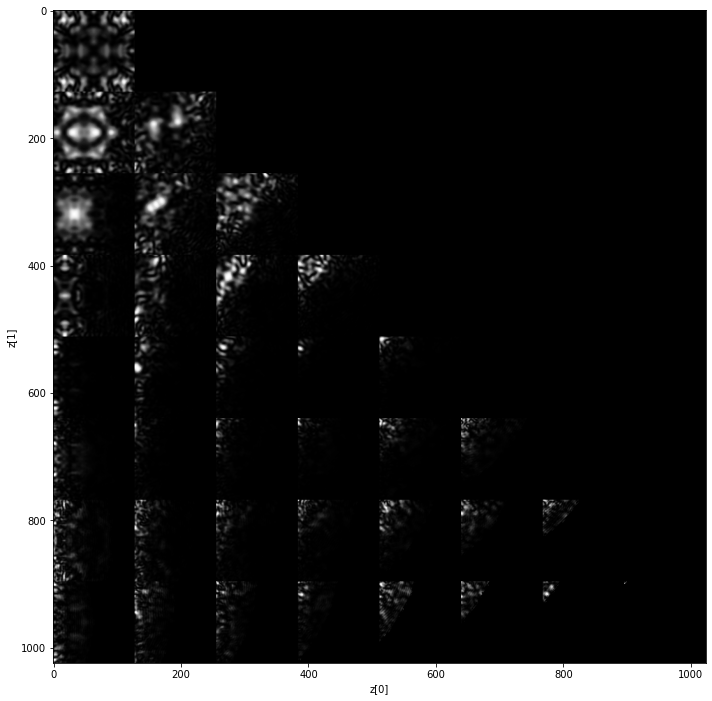

/media/ug-ml/Samsung_T5/Classification/Classification36/Data/101/7.npy


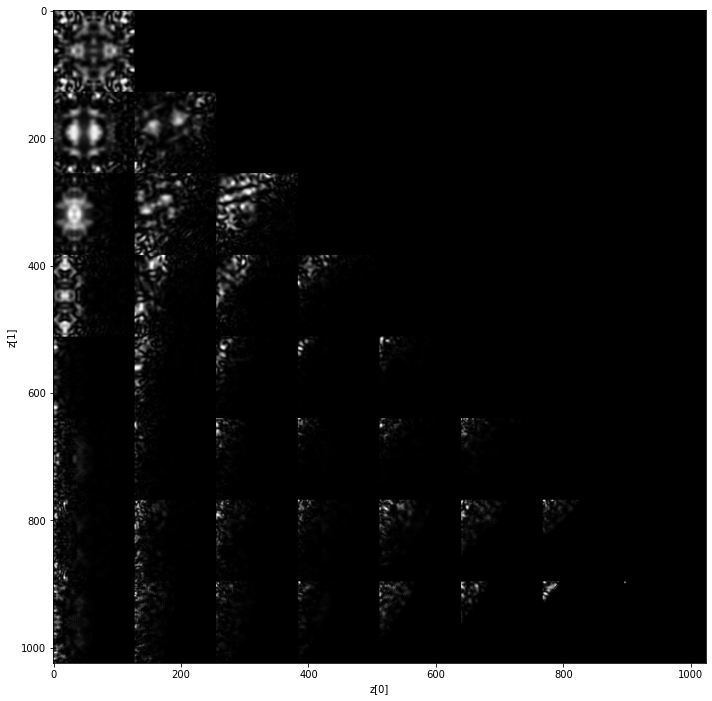

/media/ug-ml/Samsung_T5/Classification/Classification36/Data/101/8.npy


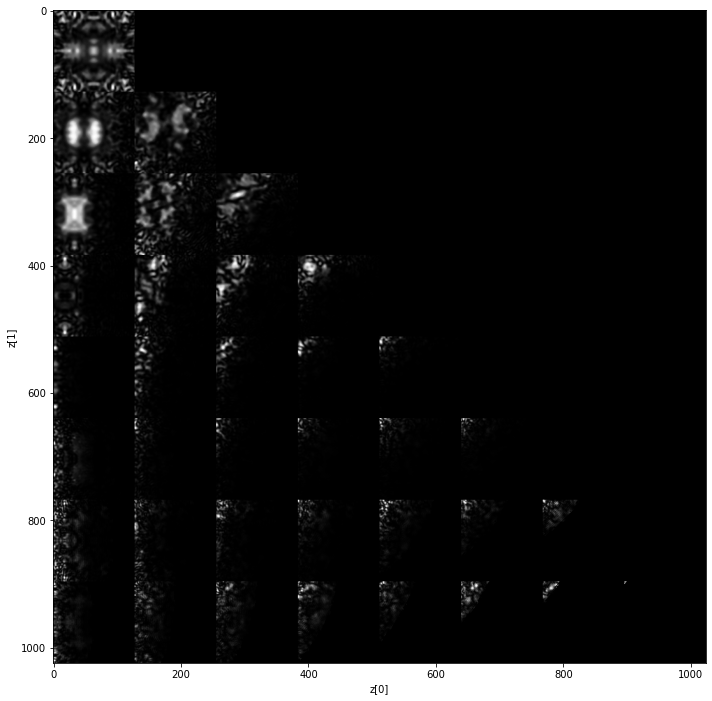

/media/ug-ml/Samsung_T5/Classification/Classification36/Data/101/9.npy


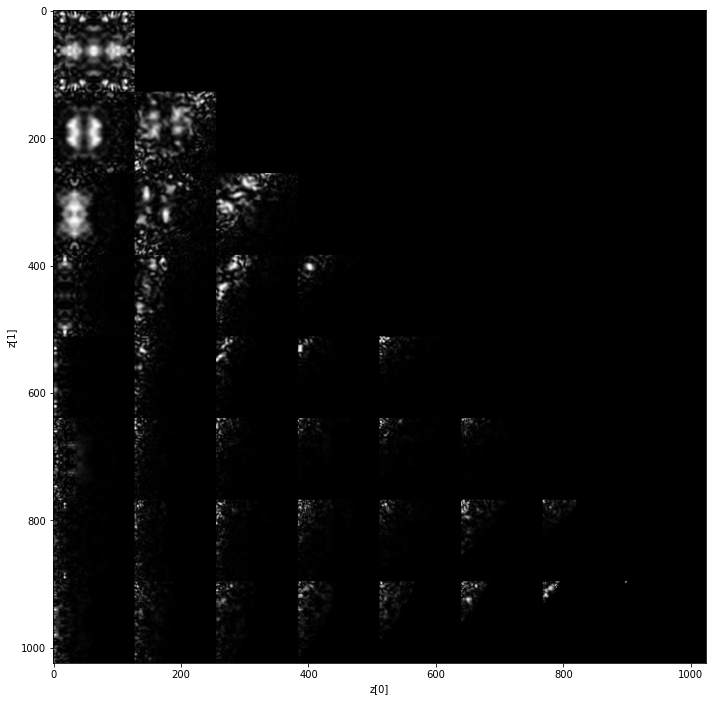

/media/ug-ml/Samsung_T5/Classification/Classification36/Data/103/


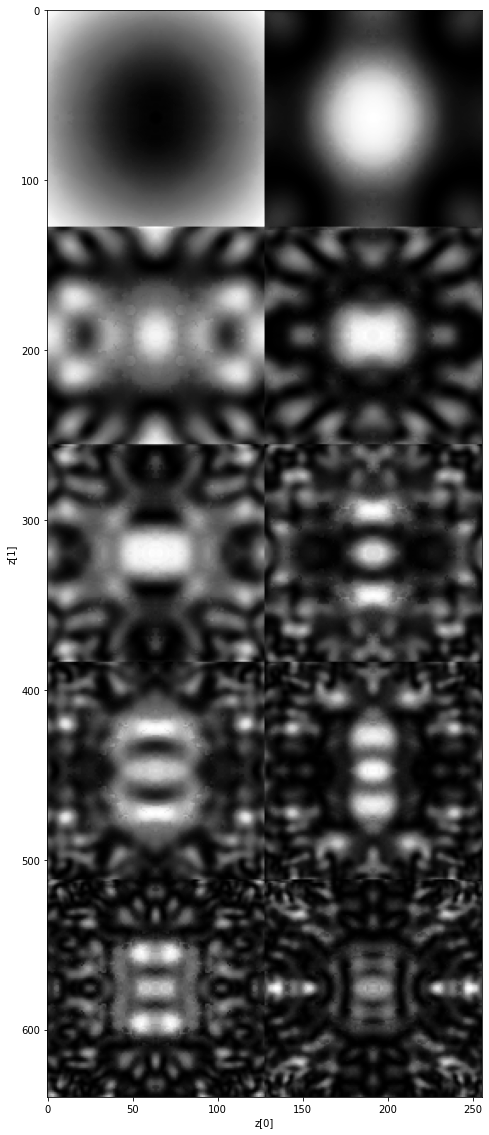

/media/ug-ml/Samsung_T5/Classification/Classification36/Data/103/0.npy


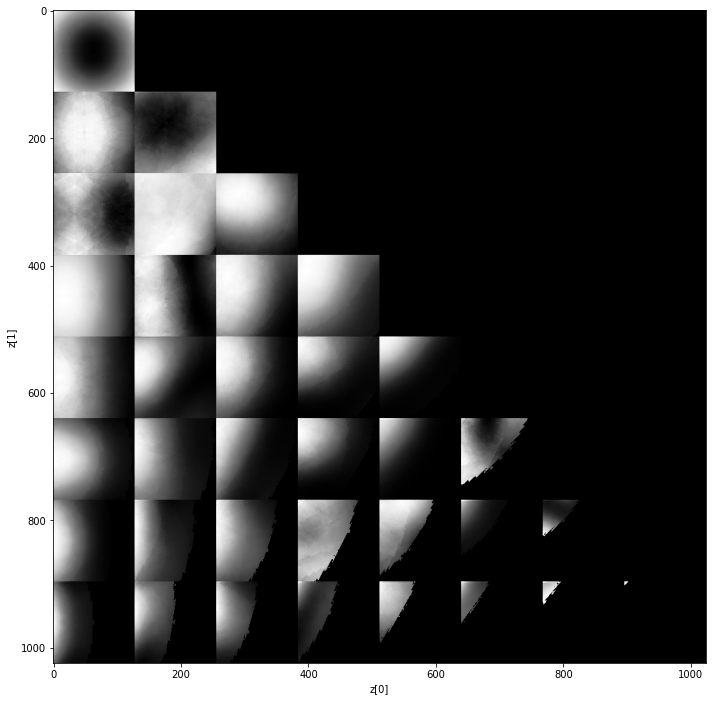

/media/ug-ml/Samsung_T5/Classification/Classification36/Data/103/1.npy


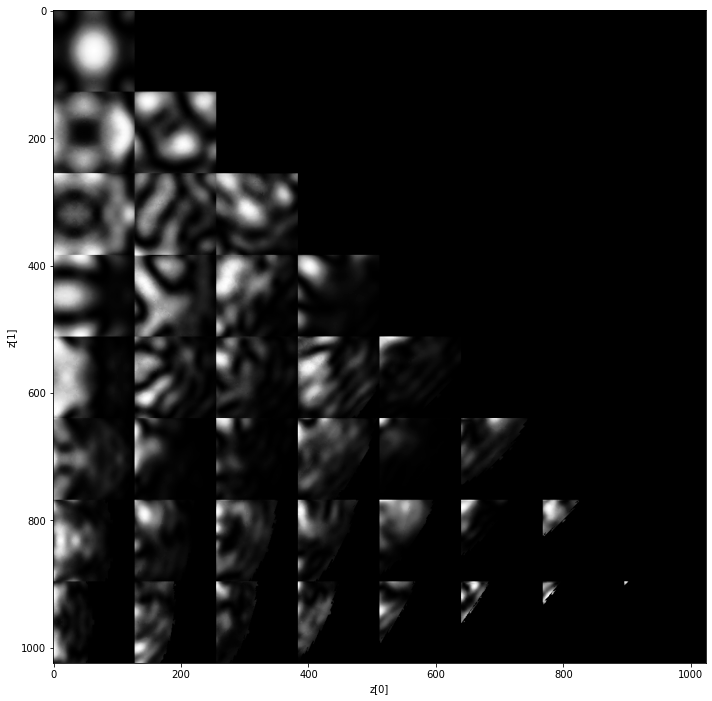

/media/ug-ml/Samsung_T5/Classification/Classification36/Data/103/2.npy


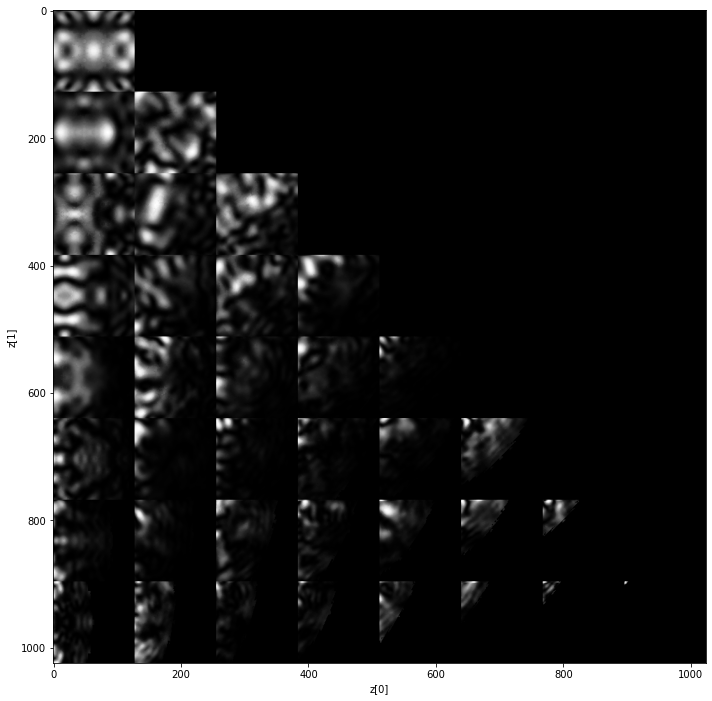

/media/ug-ml/Samsung_T5/Classification/Classification36/Data/103/3.npy


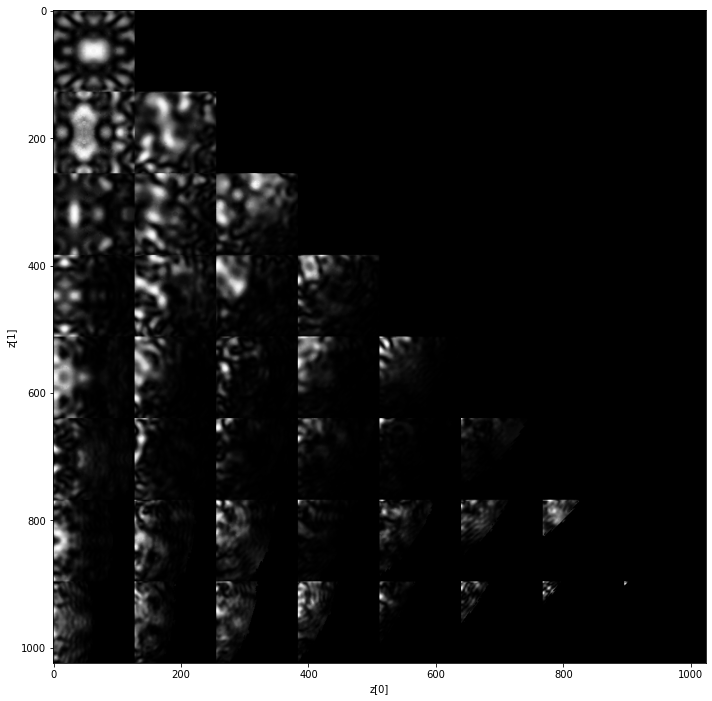

/media/ug-ml/Samsung_T5/Classification/Classification36/Data/103/4.npy


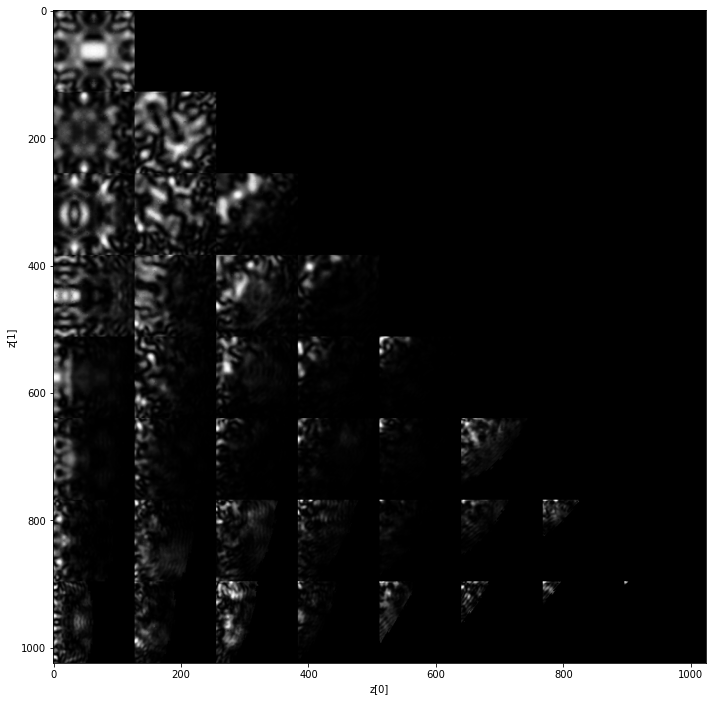

/media/ug-ml/Samsung_T5/Classification/Classification36/Data/103/5.npy


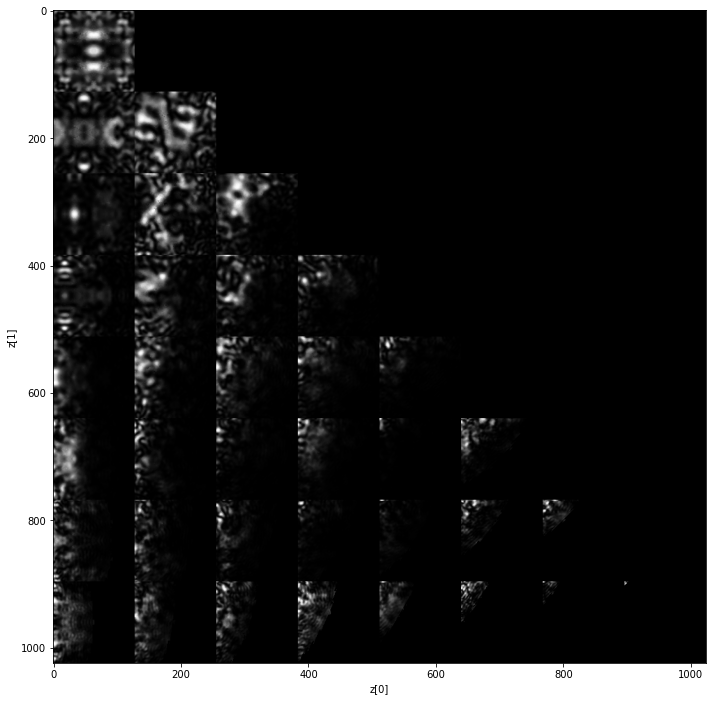

/media/ug-ml/Samsung_T5/Classification/Classification36/Data/103/6.npy


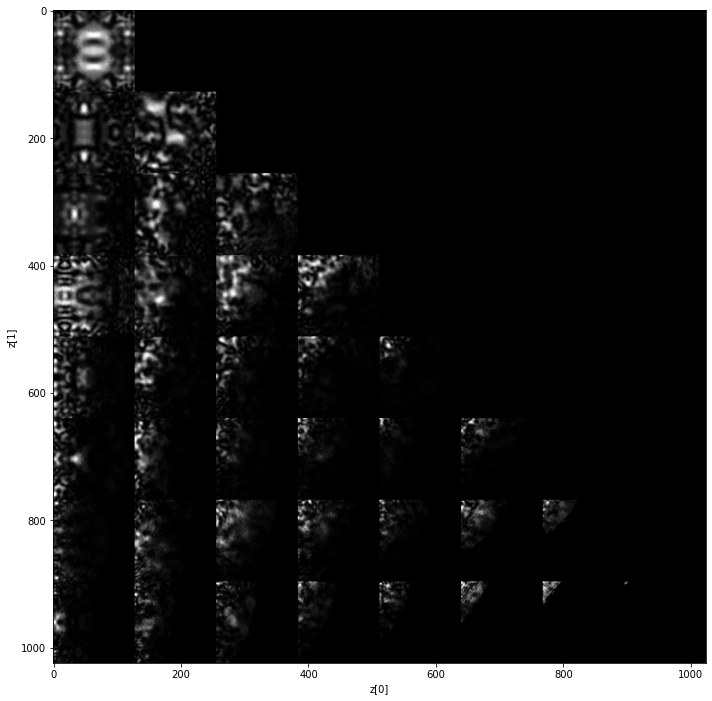

/media/ug-ml/Samsung_T5/Classification/Classification36/Data/103/7.npy


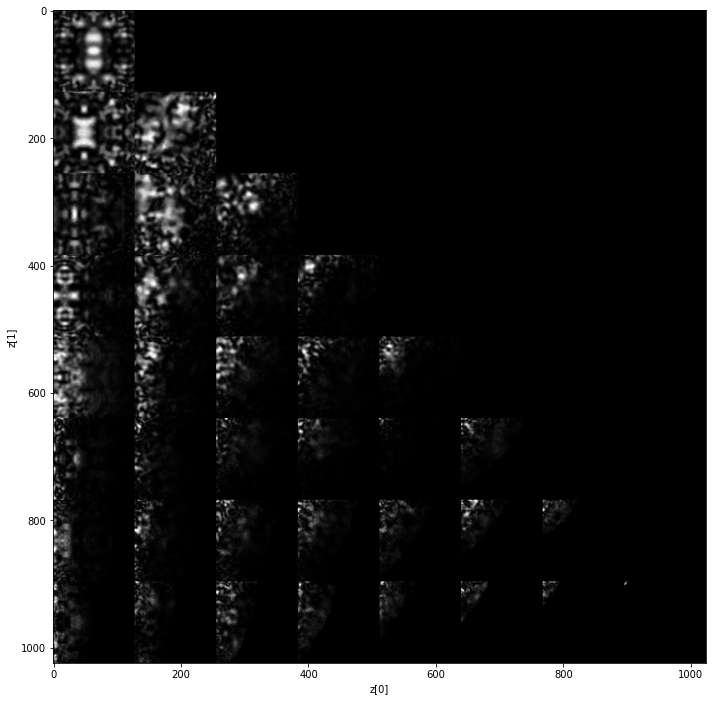

/media/ug-ml/Samsung_T5/Classification/Classification36/Data/103/8.npy


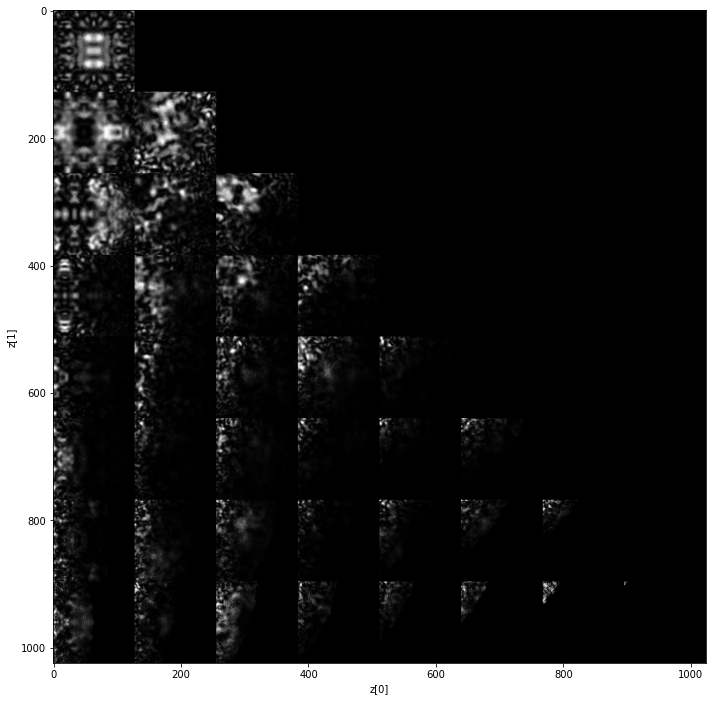

/media/ug-ml/Samsung_T5/Classification/Classification36/Data/103/9.npy


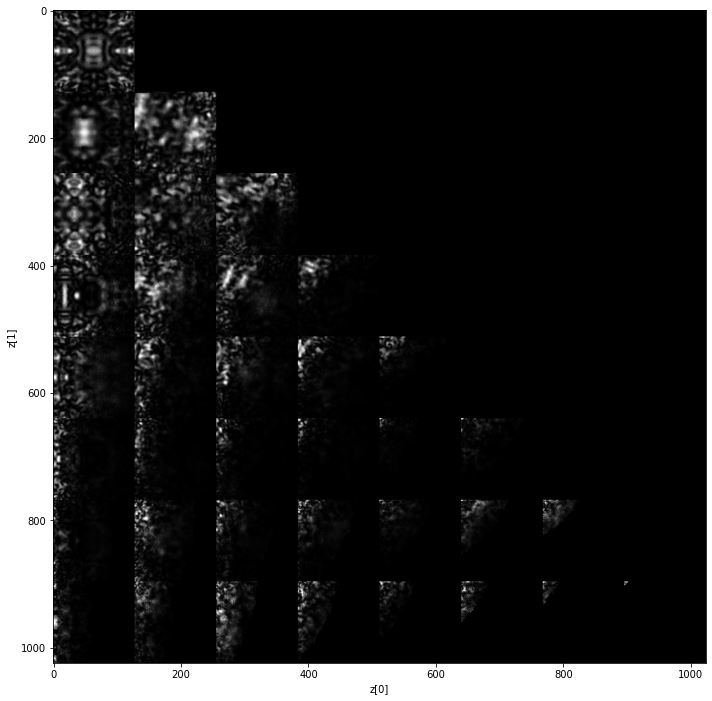

/media/ug-ml/Samsung_T5/Classification/Classification36/Data/104/


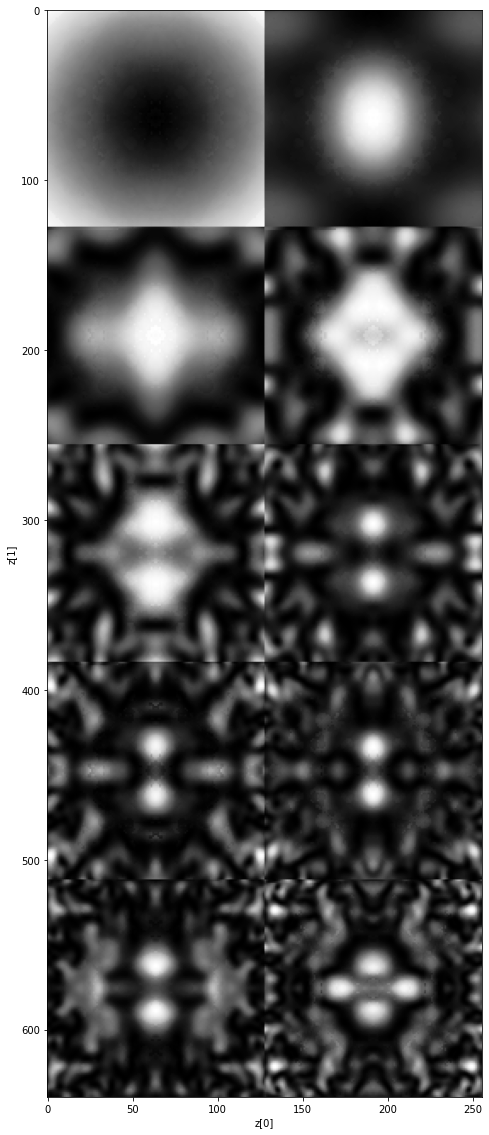

/media/ug-ml/Samsung_T5/Classification/Classification36/Data/104/0.npy


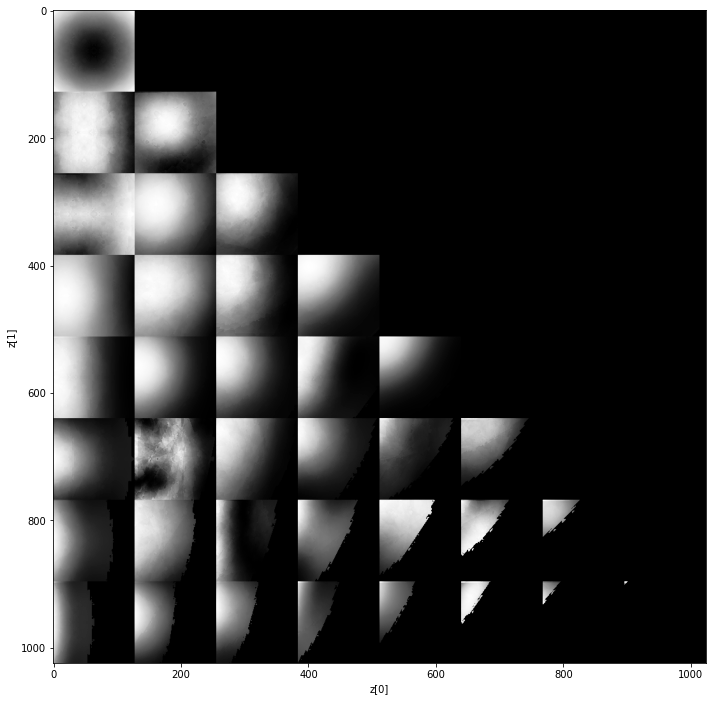

/media/ug-ml/Samsung_T5/Classification/Classification36/Data/104/1.npy


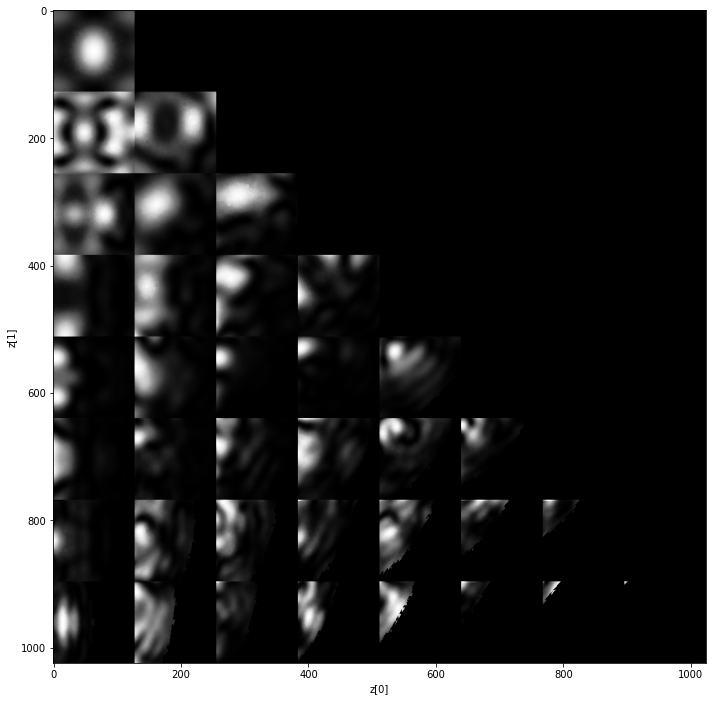

/media/ug-ml/Samsung_T5/Classification/Classification36/Data/104/2.npy


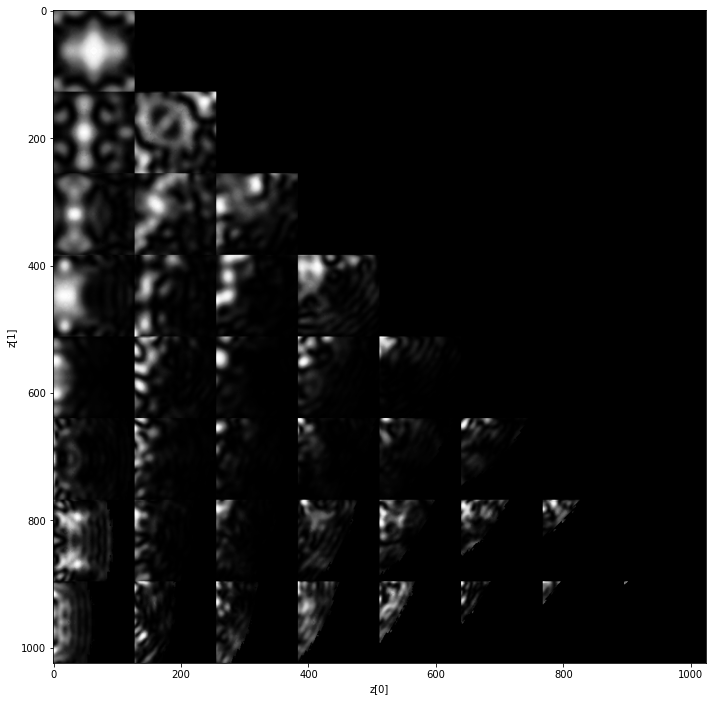

/media/ug-ml/Samsung_T5/Classification/Classification36/Data/104/3.npy


KeyboardInterrupt: 

In [4]:
IndexArray = Position()
print(IndexArray)
for i in range(0, int(len(TrainThickness) / 8)):
    
    crystal_path = TrainPath[i * 8].split("2.npy")[0]
    print(crystal_path)
    ShowAllThickness000(crystal_path)
    for j in range(0, 10):
        crystal_ij = crystal_path + str(j) + ".npy"
        print(crystal_ij)
        ShowAllDirection(IndexArray, crystal_ij)
        